# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
city_lookup = {}

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lookup[city] = lat_lng

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    payload = {'q': city, 'appid': weather_api_key}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        city_weather = requests.get(url, params=payload).json()
            
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | ixtapa
Processing Record 3 of Set 1 | veinticinco de mayo
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | nemuro
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kone
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | newman
Processing Record 13 of Set 1 | obukhiv
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | el abiodh sidi cheikh
Processing Record 18 of Set 1 | thunder bay
Processing Record 19 of Set 1 | simanggang
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | atafu village
Processi

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,275.23,58,88,4.36,TF,1689563765
1,ixtapa,20.7000,-105.2000,303.72,79,75,1.03,MX,1689563765
2,veinticinco de mayo,-35.4323,-60.1727,273.70,81,60,0.89,AR,1689563765
3,nemuro,43.3236,145.5750,286.03,93,99,2.96,JP,1689563766
4,grytviken,-54.2811,-36.5092,267.04,87,84,1.68,GS,1689563766
...,...,...,...,...,...,...,...,...,...
553,brisas de zicatela,15.8369,-97.0419,299.58,86,100,2.35,MX,1689563902
554,tindouf,27.6711,-8.1474,309.40,21,75,3.09,DZ,1689563903
555,cadale,2.7603,46.3222,298.17,82,100,7.96,SO,1689563903
556,santo antonio da platina,-23.2950,-50.0772,288.11,64,45,0.63,BR,1689563903


In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,275.23,58,88,4.36,TF,1689563765
1,ixtapa,20.7000,-105.2000,303.72,79,75,1.03,MX,1689563765
2,veinticinco de mayo,-35.4323,-60.1727,273.70,81,60,0.89,AR,1689563765
3,nemuro,43.3236,145.5750,286.03,93,99,2.96,JP,1689563766
4,grytviken,-54.2811,-36.5092,267.04,87,84,1.68,GS,1689563766


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.23,58,88,4.36,TF,1689563765
1,ixtapa,20.7000,-105.2000,303.72,79,75,1.03,MX,1689563765
2,veinticinco de mayo,-35.4323,-60.1727,273.70,81,60,0.89,AR,1689563765
3,nemuro,43.3236,145.5750,286.03,93,99,2.96,JP,1689563766
4,grytviken,-54.2811,-36.5092,267.04,87,84,1.68,GS,1689563766


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

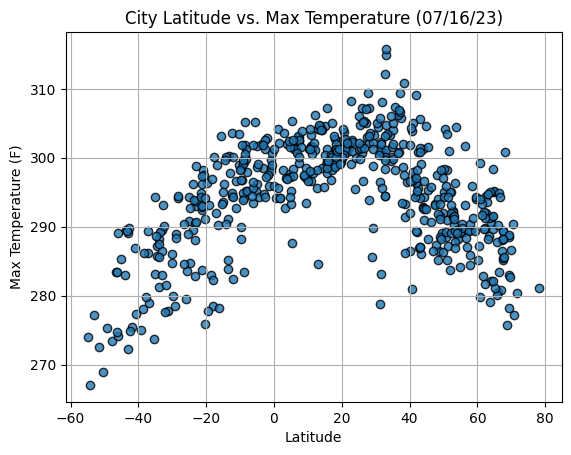

In [39]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

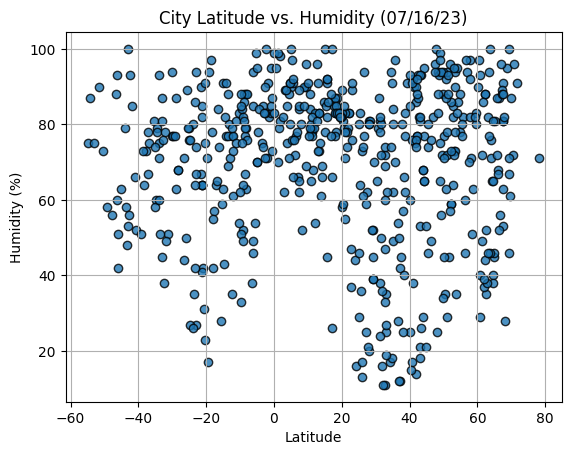

In [40]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

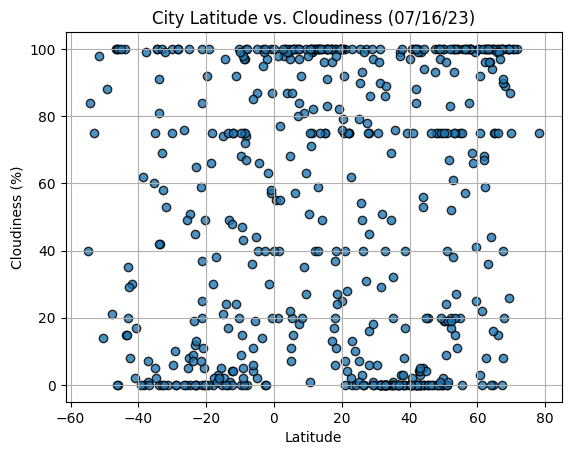

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

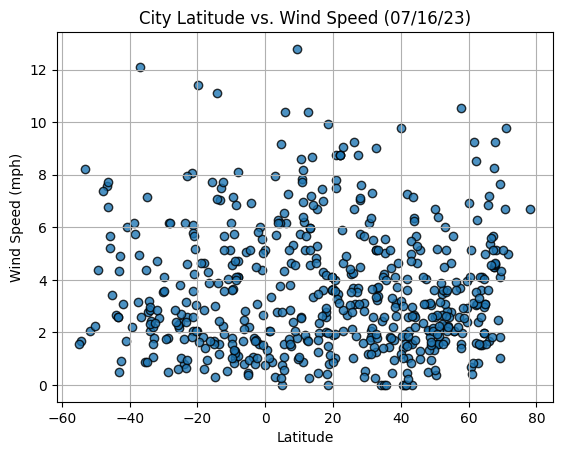

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ixtapa,20.7000,-105.2000,303.72,79,75,1.03,MX,1689563765
3,nemuro,43.3236,145.5750,286.03,93,99,2.96,JP,1689563766
10,newman,37.3138,-121.0208,309.42,42,99,0.45,US,1689563768
11,obukhiv,50.1100,30.6227,295.09,77,19,2.60,UA,1689563769
12,wailua homesteads,22.0669,-159.3780,301.39,83,75,8.75,US,1689563769


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]




# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.23,58,88,4.36,TF,1689563765
2,veinticinco de mayo,-35.4323,-60.1727,273.70,81,60,0.89,AR,1689563765
4,grytviken,-54.2811,-36.5092,267.04,87,84,1.68,GS,1689563766
5,blackmans bay,-43.0167,147.3167,289.11,53,35,4.32,AU,1689563767
6,ushuaia,-54.8000,-68.3000,273.96,75,40,1.54,AR,1689563767


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.61510331422231
y = -0.22x + 304.48


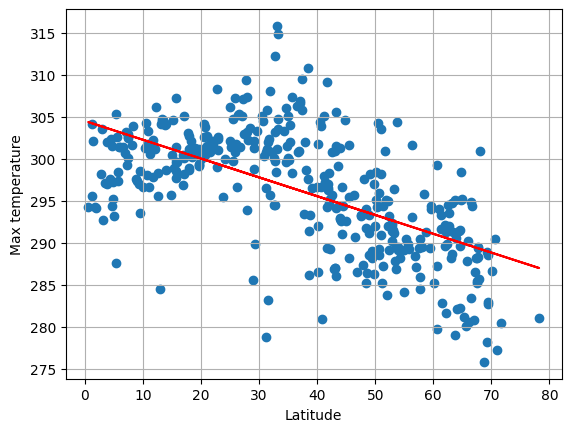

In [56]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
regEQplotX = 0
regEQplotY = -20
x_label = "Latitude"
y_label = "Max temperature"
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)



The r-square is 0.76602018943664
y = 0.46x + 300.54


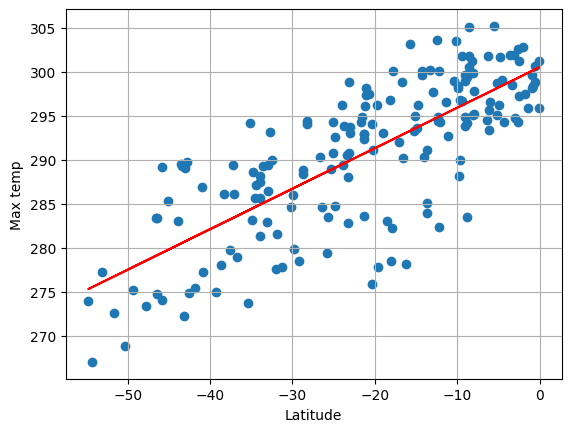

In [75]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
regEQplotX = -50
regEQplotY = 5
x_label = "latitude"
y_label = "Max temp"
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-square is -0.09708667624482091
y = -0.11x + 74.07


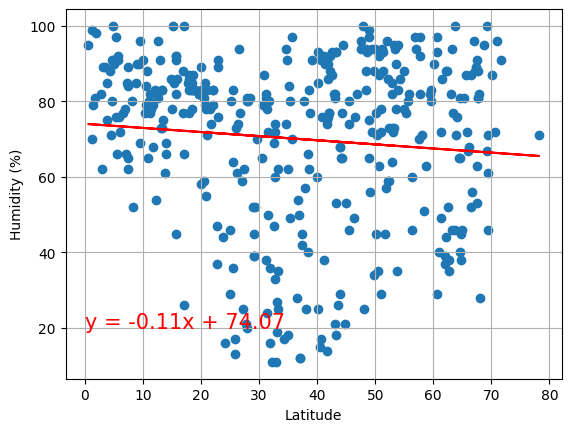

In [84]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Humidity"]
regEQplotX = 0
regEQplotY = 20
x_label = "latitude"
y_label = "Humidity (%)"
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label,)
plt.show()





The r-square is 0.1484297713753329
y = 0.19x + 74.24


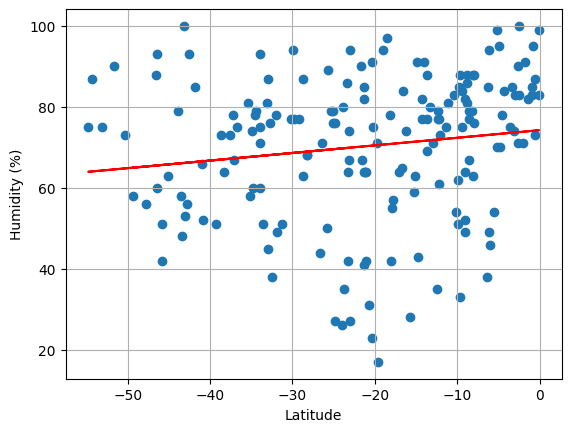

In [88]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Humidity"]
regEQplotX = 20
regEQplotY = -50
x_label = "latitude"
y_label = "Humidity (%)"
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label,)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is -0.03564470830069149
y = -0.07x + 58.58


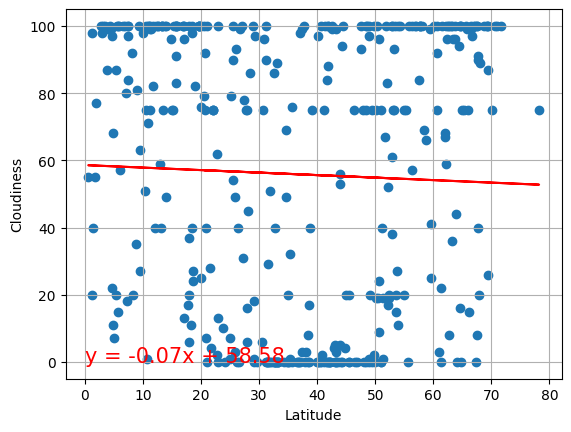

In [86]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regEQplotX = 0
regEQplotY = - 0
x_label = "latitude"
y_label = "Cloudiness"
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label,)
plt.show()



The r-square is 0.04748987448809085
y = 0.13x + 45.46


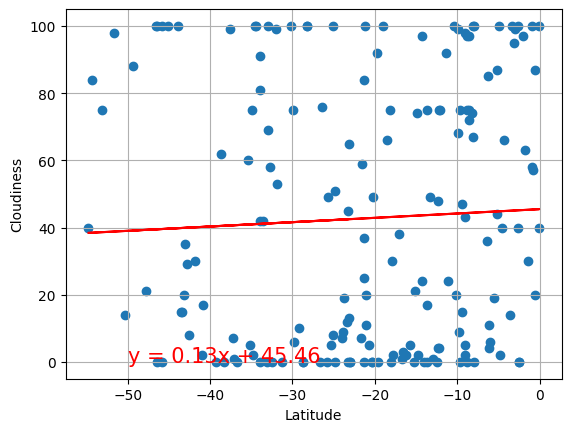

In [89]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regEQplotX = -50
regEQplotY = 0
x_label = "latitude"
y_label = "Cloudiness"
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label,)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is -0.0701264608294801
y = -0.01x + 3.9


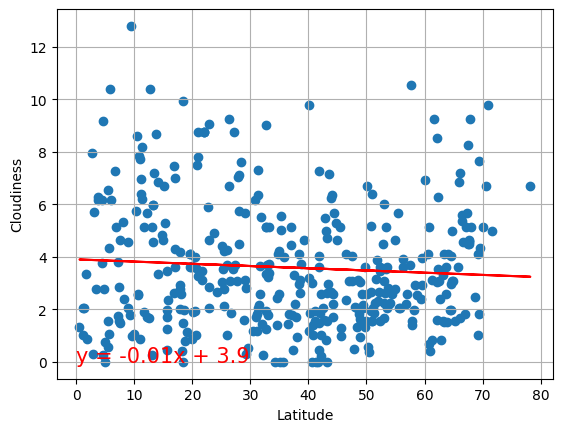

In [90]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regEQplotX = 0
regEQplotY =  0
x_label = "latitude"
y_label = "Cloudiness"
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label,)
plt.show()




The r-square is -0.08266843631232774
y = -0.01x + 3.19


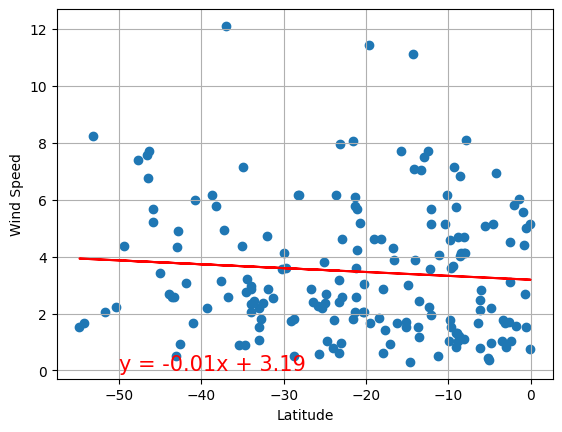

In [91]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regEQplotX = -50
regEQplotY = 0
x_label = "latitude"
y_label = "Wind Speed"
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label,)
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE